## Entering Data

In [2]:
using DataFrames, CSV, Statistics, Distributions

df = CSV.read("data.csv", DataFrame, header=false) # More Pythonic
# df = DataFrame(CSV.File("data.csv", header=false)) # Also works


,Column1
,Float64
1,2.52578
2,1.64818
3,3.53614
4,3.77024
5,3.03878
6,2.17282
7,3.61704
8,1.14447
9,3.22504


## Computing Pearson Classification Factor
_Note: The moments here are not standardized, I have computed them as they were defined in my course. For general moment analyses, use standardized forms._


In [3]:
data = df[!, "Column1"];
N_data = length(data)
M1 = Statistics.mean(data)
X = data .- M1
M2 = sum(X.^2)/(N_data-1)
M3 = sum(X.^3)/(N_data-1)
M4 = sum(X.^4)/(N_data-1)

B1 = (M3^2)/ M2^3
B2 = M4 / M2^2
PCF = 6 + 3*B1 - 2*B2

println("Pearson Classification Factor: $PCF")

Pearson Classification Factor: 2.6231084931283677


## Entering Indices to be used in CLT
Added 1 to each index as counting starts from 1 in Julia

In [4]:
indices = CSV.read("rand_indices.csv", DataFrame, header=false) .+ 1

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,93,68,16,84,66,96,39,94,1
2,21,14,99,81,36,69,4,72,39
3,87,27,66,92,16,27,4,38,60
4,10,87,42,98,80,9,8,2,68
5,56,77,81,80,64,36,62,15,41
6,80,48,93,92,50,5,86,47,2
7,18,97,78,5,46,17,99,5,67
8,9,66,82,83,55,76,81,15,35
9,19,95,41,29,20,19,13,10,62


## Creating a Normal Sample Using Central Limit Theorem
We use CLT to get a normal sample as the Student's theorem can only be used while sampling from a normal dataset.

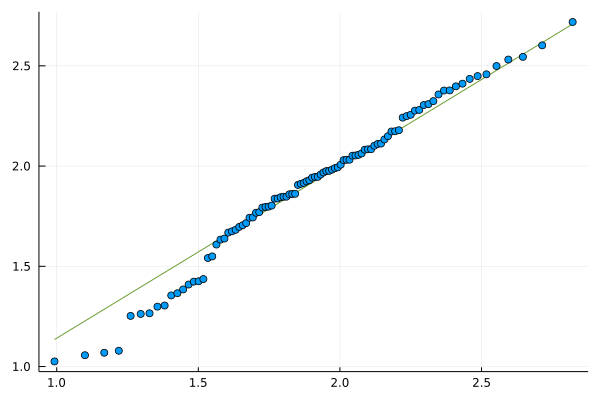

In [6]:
using StatsPlots

sample = Float64[]
for row in eachrow(indices)
    idx = convert(Array, row)
    push!(sample, sum(data[idx])/length(data[idx]))
end
StatsPlots.plot(qqnorm(sample, qqline = :R)) # NQQ Plot should give a straight line if the data is normally distributed

## Anderson-Darling Test for Normality

In [7]:
using HypothesisTests

samp_mean = mean(sample)
samp_var = var(sample, corrected=true)
samp_std = std(sample, corrected=true)

OneSampleADTest(sample, Normal(samp_mean, samp_std)) # Fails to reject H0: Distribution is normal

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.7109

Details:
    number of observations:   100
    sample mean:              1.90694923518
    sample SD:                0.3958605147157846
    A² statistic:             0.5351155626707904


## Finding Mean and Variance Ranges using Student's t Theorem

In [8]:
pop_mean = mean(data)
pop_var = var(data, corrected=false)

println("Population Mean: $pop_mean")
println("Population Variance: $pop_var")

N_samp = length(sample)

alpha = 0.01
t = TDist(99)
chi2 = Chisq(99)
tinv = quantile(t, 1-alpha/2)

mean_range = (samp_mean - abs(tinv)*samp_std/sqrt(N_samp), samp_mean + abs(tinv)*samp_std/sqrt(N_samp))
var_range = ((N_samp-1)*samp_var*10/quantile(chi2, 1-alpha/2), (N_samp-1)*samp_var*10/quantile(chi2, alpha/2))

println("Mean Range: $mean_range")
println("Variance Range: $var_range")

Population Mean: 1.9486206603
Population Variance: 1.3866697777345502
Mean Range: (1.8029802135628465, 2.0109182567971535)
Variance Range: (1.1162103891316923, 2.3325551949755052)
